# **Taylor Swift Lyrics Generator**

## **1.	Problem Formulation**

LSTM Recurrent Neural Networks can be used in many applications , the following are the most popular ones :
- Language modeling
- Text classification
- Dialog systems
- **Natural language generation**

In this project , we decided to develop a natural language generation application which consists in the generation of Taylor Swift lyrics using LSTM-RNNs.
This application will tell us if machine learning (ML) techniques could write better songs for Taylor Swift.

## **2.	Preparing the workspace**

In [0]:
#importing libraries
import numpy as np
import pandas as pd
import sys 
import seaborn as sns
from keras.models import Sequential
from keras.layers import LSTM, Activation, Flatten, Dropout, Dense, Embedding, TimeDistributed
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
import tensorflow as tf

## **3.	Pre-Processing**

We collect data from a wide range of sources and most of the time, it is collected in raw format which is not applicable for the analysis. Data Preprocessing is then the first step in starting to work with data.

### **3.1	Data Acquisition and Exploration**

In [0]:
#loading dataset
dataset = pd.read_csv('taylor_swift_lyrics.csv', encoding = "latin1")

### **3.2	The Dataset and the Data Dictionary**

Our dataset has the following data fields:
-	artist : Artist name
- album : Album name
-	track_title : Song title
-	track_n : Track number in the album
-	lyric : Lyric
-	line : Line number in the track
-	year : Year of release


### **3.3	Univariate Analysis and Quality Checks**

In [0]:
#displaying first 20 rows of the daaset
dataset.head(20)

,artist,album,track_title,track_n,lyric,line,year
0,Taylor Swift,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1,2006
1,Taylor Swift,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2,2006
2,Taylor Swift,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006
3,Taylor Swift,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006
4,Taylor Swift,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5,2006
5,Taylor Swift,Taylor Swift,Tim McGraw,1,On backroads at night,6,2006
6,Taylor Swift,Taylor Swift,Tim McGraw,1,And I was right there beside him all summer long,7,2006
7,Taylor Swift,Taylor Swift,Tim McGraw,1,And then the time we woke up to find that summ...,8,2006
8,Taylor Swift,Taylor Swift,Tim McGraw,1,But when you think Tim McGraw,9,2006
9,Taylor Swift,Taylor Swift,Tim McGraw,1,I hope you think my favorite song,10,2006


In [0]:
#shape of dataset
dataset.shape

(4862, 7)

The dataset is composed of 7 columns / variables /predictors and 4862 rows (4862 lines of lyrics from different songs)

**Univariate analysis of variables :**

•	Univariate Analysis of variable : artist

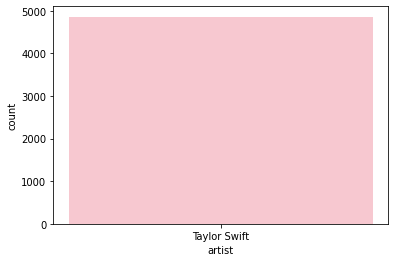

In [0]:
sns.countplot(x='artist',data=dataset,color='pink')

The variable artist only takes one value which is “Taylor Swift”, this is normal because we are analyzing Taylor Swift’s lyrics.
We can get rid of this variable because it doesn’t impact our analysis since it doesn’t change.


•	Univariate Analysis of variable : album

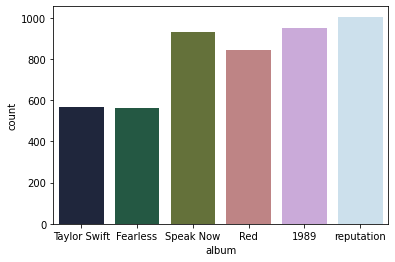

In [0]:
sns.countplot(x='album',data=dataset,palette='cubehelix')

•	Univariate Analysis of variable : track_title

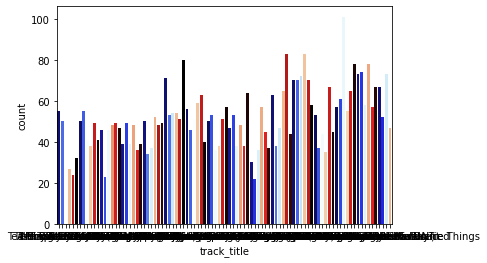

In [0]:
sns.countplot(x='track_title',data=dataset,palette='flag_r')

•	Univariate Analysis of variable : track_n

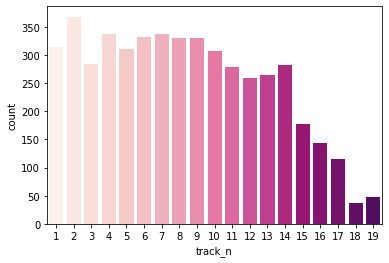

In [0]:
sns.countplot(x='track_n',data=dataset,palette='RdPu')

•	Univariate Analysis of variable : line

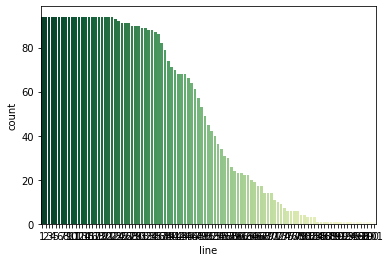

In [0]:
sns.countplot(x='line',data=dataset,palette='YlGn_r')

•	Univariate Analysis of variable : year

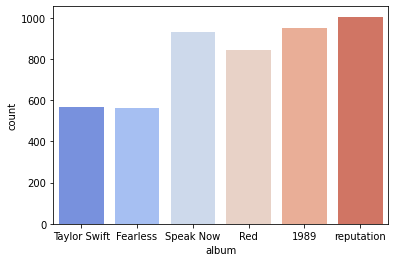

In [0]:
sns.countplot(x='album',data=dataset,palette='coolwarm')

**Quality check of dataset:**

In [0]:
#displaying info about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4862 entries, 0 to 4861
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   artist       4862 non-null   object
 1   album        4862 non-null   object
 2   track_title  4862 non-null   object
 3   track_n      4862 non-null   int64 
 4   lyric        4862 non-null   object
 5   line         4862 non-null   int64 
 6   year         4862 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 266.0+ KB


The dataset doesn’t contain missing values, we have exactly 4862 non-null values in each variable.

Now that we studied and checked our data quality, let’s prepare and tidy it in order to fit our needs.

### **3.4 Dataset Tidying**

In [0]:
#function to help us process first lines of songs
def processFirstLine(lyrics, songID, songName, row):
    lyrics.append(row['lyric'] + '\n')
    songID.append( row['year']*100+ row['track_n'])
    songName.append(row['track_title'])
    return lyrics,songID,songName

In [0]:
lyrics = [] #initializing an empty list lyrics
songID = []#initializing an empty list songID
songName = []#initializing an empty list songName

songNumber = 1 #initializing songNumber at 1

i = 0 #initializing counter i at 0

isFirstLine = True #initializing condition isFirstLine at True

for index,row in dataset.iterrows(): #iterating through dataset's row
    if(songNumber == row['track_n']):#testing if the row belongs to the song with tranck_n=songNumber
        if (isFirstLine):#testing if it’s the first lyric line of the song 
    #we use function processFirstLine to store and memorize information about the song (we append row['year']*100+ row['track_n'] to songID and row['track_title'] to songName)and append the lyric line to the list lyrics .
            lyrics,songID,songName = processFirstLine(lyrics,songID,songName,row)
            isFirstLine = False #changing value of isFirstLine to False
        else :# Ifthe row belongs to the song with tranck_n=songNumber but it is a non-first line lyric
            lyrics[i] +=  row['lyric'] + '\n'#concatenate the lyric of the row with the previous lines from the same song using iterator i.
    else :#If the row doesn’t belong to the song with tranck_n=songNumber
    #use the processFirstLine function to store information again about the new song and append the lyric line to the list lyrics.
        lyrics,songID,songName = processFirstLine(lyrics,songID,songName,row)
    #Updating value of songNumber to track_n of the new song
        songNumber = row['track_n']
    ##Updating value of i to move to the next element of lyrics
        i+=1

At the end of this program, we obtain a :
 -	List songID whose elements are unique identifiers of songs (a linear combination of year and track_n)

- List songName whose elements are track_title of songs

- List lyrics whose elements are lyrics of songs. First element for example contains lyrics of song whose track_n is 1 etc …

We define a new pandas DataFrame to save songID , songName , Lyric

In [0]:
lyrics_data = pd.DataFrame({'songID':songID, 'songName':songName, 'lyrics':lyrics }) 
#This dataframe is a table whose columns are songID(unique identifier of the song) , songName(track_title of the song) , lyrics(concatenated lyrics of each song)

Now we concatenate all songs  lyrics in one text file to use it in the LSTM RNN 

In [0]:
with open('lyricsText.txt', 'w',encoding="utf-8") as filehandle:  
    for listitem in lyrics:
        filehandle.write('%s\n' % listitem)

We load the file in one huge string that we called raw_text , raw_text is then the concatenation of all songs lyrics and we convert the lyrics to lowercase to be able to map them .

In [0]:
textFileName = 'lyricsText.txt'
raw_text = open(textFileName, encoding = 'UTF-8').read()
raw_text = raw_text.lower()

Because it gets complicated for machines to understand texts and process them, rather than numbers, and since the models are based on mathematical equations and calculations ,we have to encode the data.We create two dictionaries , one to convert chars to ints, the other to convert ints back to chars in order to map characters :

In [0]:
chars = sorted(list(set(raw_text)))
int_chars = dict((i, c) for i, c in enumerate(chars))
chars_int = dict((i, c) for c, i in enumerate(chars))

We count total number of chars and alphabet in our text :

In [0]:
n_chars = len(raw_text)
n_vocab = len(chars)

In [0]:
print('Number of Characters : ' , n_chars)
print('Number of Alphabet : ', n_vocab) 

Number of Characters :  173698
Number of Alphabet :  58


Make samples and labels to feed the LSTM RNN

The model will have to take a sequence of 100 characters as input and predict the character that follows this sequence.

In [0]:
seq_len = 100 #Inputs of the model will be sequences of 100 characters
data_X = []#initializing an empty list data_X that will store sequences of 100 characters
data_y = []#initializing an empty list data_y that will store targets of data_X
for i in range(0, n_chars - seq_len, 1):#loopint from 1 to number of sequences of length 100 in raw_text
    seq_in  = raw_text[i:i+seq_len] #taking a sequence of length 100 from raw_text
    seq_out = raw_text[i + seq_len]#taking the character that follows the sequence
    data_X.append([chars_int[char] for char in seq_in])#mapping seq_in to integers and append it to data_X
    data_y.append(chars_int[seq_out])#mapping the seq_out to integer and append it to data_y
n_patterns = len(data_X)
print( 'Total Patterns : ', n_patterns)#number of samples

Total Patterns :  173598


In [0]:
print( 'Total number of sequences : ', len(data_X))

Total number of sequences :  173598


We have  173598 records/samples of 100 sequences and their corresponding targets(the target data_y[i] of a sequence data_X[i] is the character that follow this sequence in the song)

We reshape X to be suitable to go into LSTM RNN

In [0]:
X = np.reshape(data_X , (n_patterns, seq_len, 1))

We Normalize input data :

In [0]:
X = X/ float(n_vocab)

We encode and convert the output vector of integers to binary class matrix.

In [0]:
y = np_utils.to_categorical(data_y)

In [0]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### **3.5	Test-train split**

We use function train_test_split from sklearn.model_selection to split data_X and data_y to data_X , data_y(75%) and X_test ,y_test(25%)

In [0]:
from sklearn.model_selection import train_test_split
X,X_test,y,y_test=train_test_split(X,y,random_state=42)

In [0]:
len(data_X) #total number of samples before split

173598

In [0]:
len(X) #number of samples used in training(75%)

130198

In [0]:
len(X_test) #number of samples used in testing(25%)

43400

## **4. Model Building**

### **4.1 Building the model from scratch**

In [0]:
#to obtain same results everytime we run code
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
#defining a sequential model
model = Sequential()

In [0]:
#add an LSTM layer as input layer
model.add(LSTM(256, input_shape =(X.shape[1], X.shape[2]), return_sequences = True))

In [0]:
#We add three LSTM layers as hidden layers with 256 nodesin each layer.
model.add(LSTM(256, return_sequences=True))
model.add(LSTM(256, return_sequences=True))
model.add(LSTM(256, return_sequences=True))

In [0]:
#We flatten the data that is coming from the last hidden layer to input it to the output layer
model.add(Flatten())

In [0]:
#We add a dense which is a fully connected neural network layer where each input node is connected to each output node
model.add(Dense(y.shape[1]))
#We also add an activation layer that determines activation function our neural network will use to calculate the output of a node.Since it's a multiclassification problem ,we use softmax function.
model.add(Activation('softmax'))

In [0]:
#Now we compile our model .Since it's a multiclassification problem ,we calculate the loss for each iteration of the training by using categorical cross entropy and optimise our network by using 'adam' optimizer .
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])

In [0]:
#We can see a summary of our model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 256)          264192    
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 256)          525312    
_________________________________________________________________
lstm_3 (LSTM)                (None, 100, 256)          525312    
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 256)          525312    
_________________________________________________________________
flatten_1 (Flatten)          (None, 25600)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 58)                1484858   
_________________________________________________________________
activation_1 (Activation)    (None, 58)               

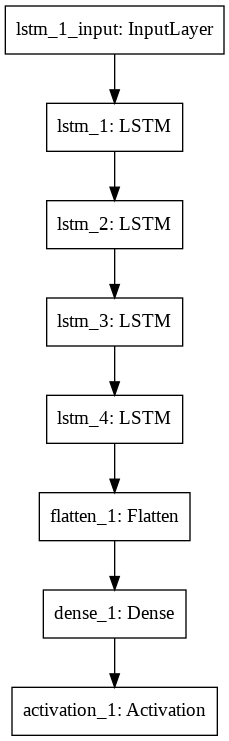

In [0]:
from tensorflow import keras
import pydot
keras.utils.plot_model(model)

In [0]:
#To avoid loosing our work ,we use model checkpoints so that the weights of the network nodes are saved to a file after every epoch.
checkpoint_name = 'Weights-LSTM-improvement-{epoch:03d}-{loss:.5f}-bigger.hdf5'
checkpoint = ModelCheckpoint(checkpoint_name, monitor='loss', verbose = 1, save_best_only = True, mode ='min')
callbacks_list = [checkpoint]

### **4.2 Training the model**

In [0]:
model_params = {'epochs':10, 
                'batch_size':128, 
                'callbacks':callbacks_list, 
                'verbose':1,
                'validation_split':0.2,
                'shuffle': True,
                'initial_epoch':0}
#training the model with parameters indicated in model_params
model_history=model.fit(X,
              y,
              model_params['epochs'],
               batch_size = model_params['batch_size'],
               callbacks= model_params['callbacks'],
               verbose = model_params['verbose'],
               validation_split = model_params['validation_split'],
               shuffle = model_params['shuffle'],
               initial_epoch = model_params['initial_epoch']
                 )

Train on 104158 samples, validate on 26040 samples
Epoch 1/10
104158/104158 [==============================] - 3663s 35ms/step - loss: 3.0268 - accuracy: 0.1736 - val_loss: 3.0226 - val_accuracy: 0.1748

Epoch 00001: loss improved from inf to 3.02677, saving model to Weights-LSTM-improvement-001-3.02677-bigger.hdf5
Epoch 2/10
104158/104158 [==============================] - 3769s 36ms/step - loss: 3.0137 - accuracy: 0.1749 - val_loss: 3.0152 - val_accuracy: 0.1748

Epoch 00002: loss improved from 3.02677 to 3.01369, saving model to Weights-LSTM-improvement-002-3.01369-bigger.hdf5
Epoch 3/10
104158/104158 [==============================] - 3678s 35ms/step - loss: 3.0115 - accuracy: 0.1749 - val_loss: 3.0138 - val_accuracy: 0.1748

Epoch 00003: loss improved from 3.01369 to 3.01153, saving model to Weights-LSTM-improvement-003-3.01153-bigger.hdf5
Epoch 4/10
104158/104158 [==============================] - 3720s 36ms/step - loss: 3.0106 - accuracy: 0.1749 - val_loss: 3.0218 - val_accuracy

Thanks to using checkpoints , you can see that some files have been downloaded.

## **5. Validation and model accuracy**

### **5.1 Validation**

We can validate our model by displaying values of accuracy of trained data, accuracy of validation data , loss on training data and loss on validation data.

In [0]:
model_history.history

{'accuracy': [0.17361124,
  0.17487855,
  0.17487855,
  0.17487855,
  0.19929338,
  0.2318977,
  0.25852072,
  0.30204114,
  0.3726838,
  0.463805],
 'loss': [3.026765645265639,
  3.01369178979778,
  3.0115282396976384,
  3.0106084034092637,
  2.898293354390447,
  2.731235963934433,
  2.591326680444632,
  2.4024336271845077,
  2.139062542801718,
  1.828040052303537],
 'val_accuracy': [0.17484639585018158,
  0.17484639585018158,
  0.17484639585018158,
  0.17484639585018158,
  0.22788017988204956,
  0.2429339438676834,
  0.2725038528442383,
  0.3138248920440674,
  0.36555299162864685,
  0.40668201446533203],
 'val_loss': [3.0225998871886786,
  3.0152142302781204,
  3.0138280971075897,
  3.021818243852958,
  2.775411755624821,
  2.6885177960227344,
  2.556533015451856,
  2.4100010668260894,
  2.2655233014746927,
  2.1554241846966486]}

We can visualize this graphically by plotting the history of our training.

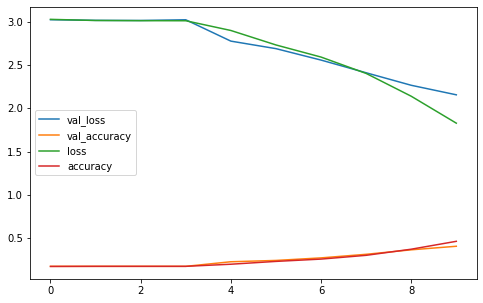

In [0]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))

We can observe that the loss is decreasing and the accuracy is increasing . This proves that the model is learning effectively and that training the network through some more epochs will enable us to reach a satisfying accuracy.

### **5.2 Model Accuracy**

In [0]:
#Checking the performance of the model
model.evaluate(X_test,y_test)

43400/43400 [==============================] - 617s 14ms/step


[2.1601990417181622, 0.4060138165950775]

## **6. Prediction and results**

### **6.1 Prediction**

Now that our model is built , trained , validated and tested , we can finally use it to predict output for new data and generate some fake lyrics.

In [0]:
start = np.random.randint(0, len(data_X)-1)#Returning a random number
pattern = data_X[start]#we pick a random index in the list as our starting point
print('Seed : ')
print("\"",''.join([int_chars[value] for value in pattern]), "\"\n")

generated_characters = 500 #generating 500 characters after initial sequence

for i in range(generated_characters):
    x = np.reshape(pattern, ( 1, len(pattern), 1))#We reshape the sequence x
    x = x / float(n_vocab)#We normalize it
    prediction = model.predict(x,verbose = 0)#We calculate the probability of each class to follow this sequence
    index = np.argmax(prediction)#We detect the index of the highest probability
    result = int_chars[index]#We map integer to character
    sys.stdout.write(result)#we display the character(result of the prediction)
    pattern.append(index)#We append this character to the sequence
    pattern = pattern[1:len(pattern)]#We remove the first character of the sequence to obtain a new sequence and repeat the same process until predicting 500 characters.
print('\nDone')


Seed : 
" es
but i don't care 'cause right now you're mine
and you'll say
don't you worry your pretty little m "

o the loven bnd to bec you drere don i denl ie alw i can't hekt thet you
wene thie mo to your wou kide the woul lnw i con't sann you cey you wer ma
you bou thet lever wou had to beb tou doui
in so your fore
i kese you love thi way h denl tea wou
aadk teel you ruind to foe you meke you aee derl btey dna thene iy nete
and you doued she wou cot i doen wou wou wank to rha you coer tee cecus th tee tay the fart to thi wou wou doeet in the wour wou sorce you can tee wou and you lese me oee your and i 
Done


Then we see our 500 characters being generated..